In [50]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---

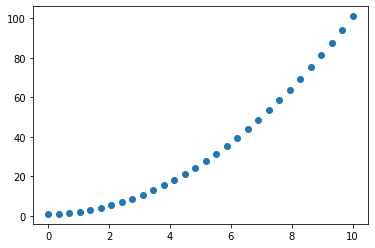

In [51]:
# generating data
x = np.array(np.linspace(0, 10, 30))
y = np.power(x, 2) + 1

# plotting 
plt.scatter(x, y)
plt.show()

In [52]:
x = np.matrix(np.linspace(0,10,30)).T
y = np.power(x, 2) + 1

In [53]:
# creating matrix of ones
m = x.size
ones = np.ones([m, 1])

# concatinating ones to X
X = np.concatenate((ones, x), axis = 1)

#matrix([[ 1.        ,  0.        ],
#        [ 1.        ,  0.34482759],
#        [ 1.        ,  0.68965517],
#        [ 1.        ,  1.03448276],
#               ...
#        [ 1.        ,  1.37931034],
#        [ 1.        ,  1.72413793],
#        [ 1.        , 10.        ]])

In [54]:
# creating regression coefficients weights
theta = np.matrix('0.1;1.3')
theta

matrix([[0.1],
        [1.3]])

In [55]:
# Calculus: y = theta_0 + theta_1 * x
# Algebra: A*x(theta) = Y(b)

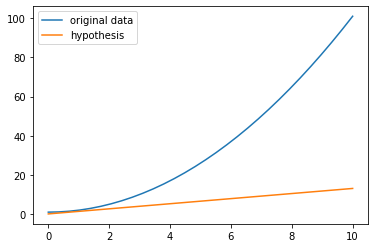

In [56]:
# calculating Y values given weights (hypothesis)
y_pred_h = np.dot(X, theta)

# plotting
plt.plot(x, y, label = 'original data')
plt.plot(x, y_pred_h, label = 'hypothesis')
plt.legend()
plt.show()

In [57]:
# creating a learning rate coefficient and number of epochs (iterations)
alpha = 0.05
epochs = 500

In [58]:
# training the model
def updateTheta(theta, y_original, y_pred):
    error = y_pred - y_original
    
    theta[0][0] -= alpha*(1/m)*np.sum(np.multiply(error, X[:,0]))
    theta[1][0] -= alpha*(1/m)*np.sum(np.multiply(error, X[:,1]))

    return theta

for i in range(epochs):
    theta = updateTheta(theta, y, y_pred_h)
    y_pred_h = np.dot(X, theta)


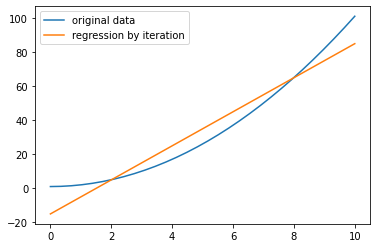

In [59]:
# plotting
plt.plot(x, y, label = 'original data')
plt.plot(x, y_pred_h, label = 'regression by iteration')
plt.legend()
plt.show()

In [60]:
# metrics
MSE = np.sum(np.power((y_pred_h - y), 2))
MSE

1898.1284057573048

---

### Ex 1

In [61]:
# equation of form Ax=b, A - input (X), x - weights (theta), b (observed values Y)
A = X
b = y

In [62]:
A = np.concatenate((A, np.power(A[:,1], 2)), axis = 1)

# normalization
A = A/A.max()
A

matrix([[0.01      , 0.        , 0.        ],
        [0.01      , 0.00344828, 0.00118906],
        [0.01      , 0.00689655, 0.00475624],
        [0.01      , 0.01034483, 0.01070155],
        [0.01      , 0.0137931 , 0.01902497],
        [0.01      , 0.01724138, 0.02972652],
        [0.01      , 0.02068966, 0.04280618],
        [0.01      , 0.02413793, 0.05826397],
        [0.01      , 0.02758621, 0.07609988],
        [0.01      , 0.03103448, 0.09631391],
        [0.01      , 0.03448276, 0.11890606],
        [0.01      , 0.03793103, 0.14387634],
        [0.01      , 0.04137931, 0.17122473],
        [0.01      , 0.04482759, 0.20095125],
        [0.01      , 0.04827586, 0.23305589],
        [0.01      , 0.05172414, 0.26753864],
        [0.01      , 0.05517241, 0.30439952],
        [0.01      , 0.05862069, 0.34363853],
        [0.01      , 0.06206897, 0.38525565],
        [0.01      , 0.06551724, 0.42925089],
        [0.01      , 0.06896552, 0.47562426],
        [0.01      , 0.07241379, 0

In [63]:
# creating regression coefficients weights
weights = np.matrix('0.1;1.3;0.6')
alpha = 0.05
epoch = 500

In [64]:
# hypothesis function
def hypothesisY(X, weights):
    return np.dot(X, weights)

In [65]:
# MSE
def MSE(X, y, weights):
    y_pred = hypothesisY(X, weights)
    return np.sum(np.sqrt(np.square(y - y_pred)))/(2*m)

In [66]:
# Gradient-decent algorithm
def PolynomialRegressionFit(X, y):
    # array of costs
    mse = []
    
    for i in range(epoch):
        # find hypothesis 
        y_pred = hypothesisY(X, weights)
        
        for j in range(X.shape[1]): # per column
            error = y_pred - y
            weights[j][0] -= alpha*(1/m)*np.sum(np.multiply(error, X[:, j]))
        
        # calculating cost
        mse.append(MSE(X, y, weights))
    
    return mse, weights

In [67]:
# fitting the model
PolynomialRegressionFit(A, b)

([17.136083512458193,
  16.954825085680614,
  16.77550266843101,
  16.598095582151082,
  16.422583369150647,
  16.24894579024856,
  16.077162822438762,
  15.90721465658138,
  15.739081695118351,
  15.572744549813558,
  15.408184039517039,
  15.245381187953091,
  15.084317221532022,
  14.924973567185232,
  14.767331850223476,
  14.611373892217935,
  14.457081708903978,
  14.304437508107275,
  14.153423687692099,
  14.004022833531488,
  13.856217717499153,
  13.70999129548277,
  13.565326705418538,
  13.422207265346726,
  13.280616471487958,
  13.140537996340072,
  13.001955686795297,
  12.86485356227755,
  12.729215812899621,
  12.595026797640033,
  12.462271042539387,
  12.33093323891597,
  12.200998241600422,
  12.072451067189256,
  11.94527689231703,
  11.819461051946991,
  11.694989037679932,
  11.571846496081179,
  11.450019227025386,
  11.329493182059053,
  11.210254462780505,
  11.092289319237182,
  10.97558414834006,
  10.860125492294996,
  10.745900037050827,
  10.6328946107640

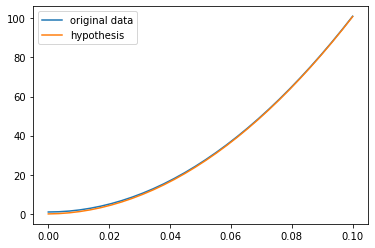

In [68]:
# calculating Y values given weights (hypothesis)
y_pred_h = hypothesisY(A, weights)

# plotting
plt.plot(A[:,1], b, label = 'original data')
plt.plot(A[:,1], y_pred_h, label = 'hypothesis')
plt.legend()
plt.show()

---

### Ex 2

In [69]:
# inverse matrix
Inverse = np.dot(A.T, A).I
weights = np.dot(np.dot(Inverse, A.T), y)
weights

matrix([[ 1.00000000e+02],
        [-9.09494702e-13],
        [ 1.00000000e+02]])

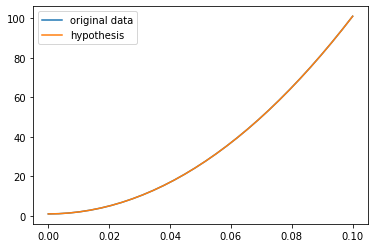

In [70]:
# calculating Y values given weights (hypothesis)
y_pred_h = hypothesisY(A, weights)

# plotting
plt.plot(A[:,1], b, label = 'original data')
plt.plot(A[:,1], y_pred_h, label = 'hypothesis')
plt.legend()
plt.show()

In [71]:
# error = 0.00000000000015102178766805233 ≈ 0.0
MSE(A, b, weights)

1.5102178766805233e-13